In [1]:
import ROOT as r

r.gSystem.Load("PDFs/PdfDiagonalizer_cc.so")
r.gSystem.Load("PDFs/Util_cxx.so")
r.gSystem.Load("PDFs/HWWLVJRooPdfs_cxx.so")

# To surpress unwanted messages
msgservice = r.RooMsgService.instance()
msgservice.setGlobalKillBelow(r.RooFit.FATAL)

%matplotlib inline

Welcome to JupyROOT 6.08/05


In [2]:
fin = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_2018_01_25_14h36/Hadds_for_BkgEstimation/WWTree_WJets.root")

treeIn = fin.Get("otree")

In [3]:
h1 = r.TH1F("h1","",67,170,3500)
#h1.Sumw2()
#h1.SetMinimum(0.)

cutString =  "btag0Wgt*genWeight*trig_eff_Weight*id_eff_Weight*pu_Weight*((l_pt2<0) && ((l_pt1>30.) && (abs(l_eta1)<2.5)) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) && (vbf_maxpt_jj_m>500) && (nBTagJet_loose==0) && (pfMET_Corr>50) && ((PuppiAK8_jet_tau2tau1<0.55)) && ((PuppiAK8_jet_mass_so>40 && PuppiAK8_jet_mass_so<65) || (PuppiAK8_jet_mass_so>105 && PuppiAK8_jet_mass_so<150)) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && (vbf_maxpt_jj_m>800) && (BosonCentrality_type0>1.0) && (abs(ZeppenfeldWL_type0/vbf_maxpt_jj_Deta)<0.3) && (abs(ZeppenfeldWH/vbf_maxpt_jj_Deta)<0.3) && (mass_lvj_type0>170))"

treeIn.Draw("mass_lvj_type0>>h1",cutString)

10803L

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


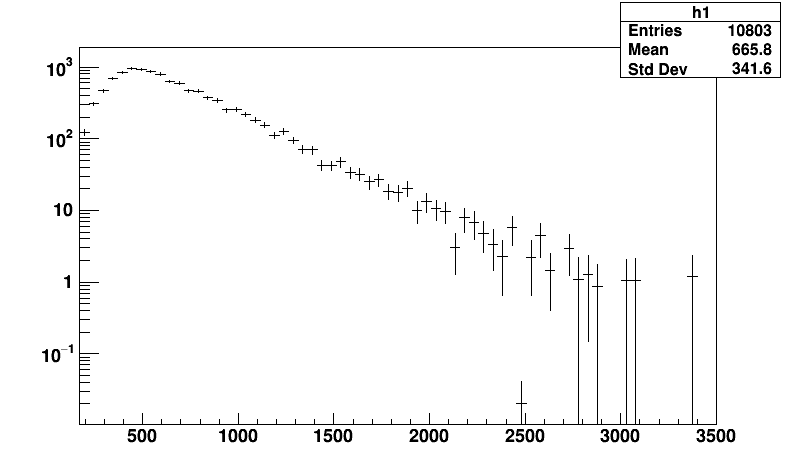

In [4]:
c1 = r.TCanvas("c1", "canvas", 800, 500)
c1.SetLogy()

h1.Draw()
c1.Draw()


## Define a Landau + ExpN function

In [51]:
#fLandau = r.TF1("fLandau","TMath::Landau(x,484.21,100.)",170,3500)
#fexpN = r.TF1("fexpN","TMath::Exp(-0.0055655*x-977.04/x)",170,3500)

fLandau = r.TF1("fLandau","[0]*TMath::Landau(x,[1],[2])",170,3500)
fLandau.SetParameters(-2.05866e+01,700.,-1.)
fexpN = r.TF1("fexpN","[0]*TMath::Exp([1]*x+[2]/x)",170,3500)
fexpN.SetParameters(1.31006e+04,-5.22514e-03,-1.18472e+03)



#fLandauExpN = r.TF1("fLandauExpN","7062.3*((1-0.1737)*fLandau+(0.1737)*fexpN)",170,3500)
fLandauExpN = r.TF1("fLandauExpN","fLandau+fexpN",170,3500)


h1.Fit("fLandauExpN","S")


 FCN=347.771 FROM HESSE     STATUS=FAILED         11 CALLS        1035 TOTAL
                     EDM=6.93759e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY 100.0 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -5.28241e+05   8.73415e+00  -0.00000e+00   0.00000e+00
   2  p1           7.00000e+02   1.41421e+00  -0.00000e+00   0.00000e+00
   3  p2          -8.60944e+05   1.41421e+00   3.47636e+02   0.00000e+00
   4  p3           1.31007e+05   1.31505e+03  -5.25973e+01  -2.60487e-07
   5  p4          -5.22515e-03   1.42614e-05   2.25198e-07  -2.98608e+01
   6  p5          -1.18472e+03   4.84224e+00   1.13222e-01  -5.89180e-05


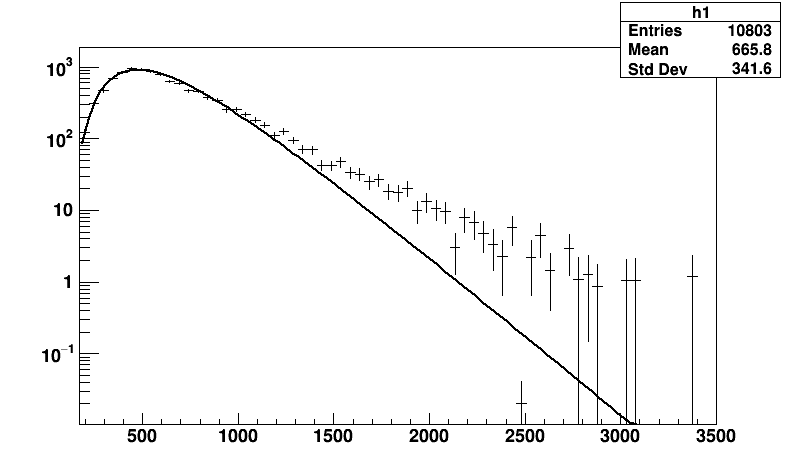

In [52]:
h1.Draw()
fLandauExpN.Draw("same")
c1.Draw()

# END of notebook

**Get histogram to RooVariable and delete the histogram**